In [1]:
import pandas as pd
import numpy as np

In [2]:
# get data
data = pd.read_csv("../전처리/전처리_최종_V3.csv", encoding="CP949")
data.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
# 발행회차, 일자, 기준월을 그룹화하여 재정렬
# test2 = data.groupby(['발행회차','발행일자','기준월']).sum()
# test2.to_csv("../전처리/mbs_groupby.csv", encoding="CP949")

In [4]:
# 재정렬 결과 가져오기
# test3 = pd.read_csv("../전처리/mbs_groupby.csv", encoding="CP949")
# test3

In [5]:
# MBS 처리를 위한 시험용 코드
# test_drop = test3.drop_duplicates(['기준우']).reset_index()

In [6]:
# 기준월 기준으로 데이터 그룹화
data_a = data.groupby(['기준월']).mean()

# 금리 차이 구하기
# data_a['금리차'] = data_a['예금은행 대출금리'] - data_a['가중평균발행금리']
# data_a

In [7]:
# 소비자 물가지수 차이 구하기 (a.k.a. 인플레이션 비율)
# 올해 소비자 물가지수 - 지난해 소비자물가지수 / 지난해 소비자 물가지수 * 100
data_a['인플레이션율'] = (data_a['소비자물가지수'].diff() / data_a['소비자물가지수'].shift(1)) * 100
data_a

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,조기상환율,CD금리,인플레이션율
기준월,,,,,,,,,,,,,
2004-06,0.510000,5.040000,52.743,51.435,72.119,794.0,785.79,5.99,60.660000,34.530000,0.510000,3.91,NaN
2004-07,0.270000,5.020000,52.603,51.040,72.561,858.0,735.34,5.93,61.090000,29.270000,0.270000,3.91,0.612876
2004-08,0.270000,4.846667,52.394,50.554,73.191,842.0,803.57,5.80,60.920000,31.370000,0.270000,3.70,0.868235
2004-09,0.380000,4.700000,52.283,50.314,73.191,784.0,835.09,5.63,60.830000,32.417500,0.380000,3.52,0.000000
2004-10,0.508000,4.600000,52.157,50.090,73.191,801.0,834.84,5.57,60.896000,33.138000,0.508000,3.52,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02,0.929633,2.478739,100.207,100.197,105.300,800.0,2699.18,3.88,60.585462,30.043799,0.929633,1.50,0.582673
2022-03,0.839380,2.477937,100.306,100.337,106.060,798.0,2757.65,3.84,60.576111,30.068175,0.825611,1.50,0.721747
2022-04,0.888984,2.463891,100.517,100.543,106.850,813.0,2695.05,3.90,60.578833,30.048621,0.892509,1.64,0.744861


- 만기전 상환율 : Target -> 건드리지 마
- 가중평균발행금리, 금리차, 조기상환율, LTV, DTI -> 건드리지 마
- 주택종합 매매가격지수, 전세가격지수 : lag 처리
- 실업자, 소비자물가지수 : lag 처리하고 log 처리
- 예금은행대출금리, CD금리, 코스피 : lag 처리 하고 log 차분

In [8]:
data_a['주택종합 매매가격지수'] = data_a['주택종합 매매가격지수'].shift(1)
data_a['주택종합 전세가격지수'] = data_a['주택종합 전세가격지수'].shift(1)
data_a["예금은행 대출금리"] = np.log(data_a["예금은행 대출금리"]).shift(1)
data_a["소비자물가지수"] = np.log(data_a["소비자물가지수"]).shift(1)
data_a["코스피 월별 종가"] = np.log(data_a["코스피 월별 종가"]).shift(1)
data_a["15-64 실업자 수"] = np.log(data_a["15-64 실업자 수"]).shift(1)
data_a["CD금리"] = np.log(data_a["CD금리"]).shift(1)

In [9]:
# 결측치 및 중복컬럼 삭제
data_a.dropna(inplace=True)
data_a.drop(columns=['조기상환율'], inplace=True)

In [10]:
data_a

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율
기준월,,,,,,,,,,,,
2004-07,0.270000,5.020000,52.743,51.435,4.278318,6.677083,6.666690,1.790091,61.090000,29.270000,1.363537,0.612876
2004-08,0.270000,4.846667,52.603,51.040,4.284428,6.754604,6.600333,1.780024,60.920000,31.370000,1.363537,0.868235
2004-09,0.380000,4.700000,52.394,50.554,4.293072,6.735780,6.689064,1.757858,60.830000,32.417500,1.308333,0.000000
2004-10,0.508000,4.600000,52.283,50.314,4.293072,6.664409,6.727540,1.728109,60.896000,33.138000,1.258461,0.000000
2004-11,0.358333,4.515000,52.157,50.090,4.293072,6.685861,6.727240,1.717395,60.976667,33.403333,1.258461,-0.602533
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02,0.929633,2.478739,100.000,100.000,4.651004,6.659294,7.887336,1.348073,60.585462,30.043799,0.329304,0.582673
2022-03,0.839380,2.477937,100.207,100.197,4.656813,6.684612,7.900703,1.355835,60.576111,30.068175,0.405465,0.721747
2022-04,0.888984,2.463891,100.306,100.337,4.664005,6.682109,7.922134,1.345472,60.578833,30.048621,0.405465,0.744861


### 기초통계량 분석

In [11]:
# 데이터프레임의 정보, 결측치 확인
data_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 2004-07 to 2022-06
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   만기전상환율       214 non-null    float64
 1   가중평균발행금리     214 non-null    float64
 2   주택종합 매매가격지수  214 non-null    float64
 3   주택종합 전세가격지수  214 non-null    float64
 4   소비자물가지수      214 non-null    float64
 5   15-64 실업자 수  214 non-null    float64
 6   코스피 월별 종가    214 non-null    float64
 7   예금은행 대출금리    214 non-null    float64
 8   평균 LTV       214 non-null    float64
 9   평균 DTI       214 non-null    float64
 10  CD금리         214 non-null    float64
 11  인플레이션율       214 non-null    float64
dtypes: float64(12)
memory usage: 21.7+ KB


In [12]:
# 결측치 확인
data_a.isna().sum()

만기전상환율         0
가중평균발행금리       0
주택종합 매매가격지수    0
주택종합 전세가격지수    0
소비자물가지수        0
15-64 실업자 수    0
코스피 월별 종가      0
예금은행 대출금리      0
평균 LTV         0
평균 DTI         0
CD금리           0
인플레이션율         0
dtype: int64

In [13]:
# 기초 통계 조회
data_a.describe()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2.125790,3.773027,70.835033,72.083953,4.496383,6.771244,7.513644,1.415123,59.874064,32.485376,0.866499,0.190444
std,1.295680,0.954468,11.059051,15.072584,0.106253,0.131812,0.288032,0.314779,1.158292,1.313916,0.542269,0.352039
min,0.037500,2.447768,51.567000,49.086000,4.278318,6.527958,6.600333,0.871293,57.812188,29.270000,-0.462035,-0.744313
25%,1.236738,2.869294,63.628000,56.417250,4.414212,6.677712,7.395603,1.152934,59.055704,31.498212,0.490109,-0.067598
50%,1.748847,3.411875,70.716000,73.672000,4.531157,6.748760,7.583812,1.360977,59.968668,32.773154,0.974560,0.181225
75%,2.753005,4.801858,77.204250,85.564000,4.584640,6.856462,7.652164,1.695616,60.562161,33.592059,1.264127,0.404551
max,9.681872,5.236765,100.768000,100.814000,4.678049,7.078342,8.100671,2.025513,62.019524,34.461733,1.796747,1.188525


In [14]:
# 아주 간단하게 상관관계 분석
data_a.corr()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율
만기전상환율,1.000000,-0.212187,0.071402,0.212557,0.265383,0.091006,0.221319,-0.333767,-0.471657,0.328658,-0.120067,-0.208592
가중평균발행금리,-0.212187,1.000000,-0.859188,-0.960978,-0.905004,-0.408910,-0.737516,0.945414,0.087004,0.622796,0.877357,0.122854
주택종합 매매가격지수,0.071402,-0.859188,1.000000,0.950540,0.935405,0.224822,0.863680,-0.750758,-0.152847,-0.665767,-0.807315,0.013417
주택종합 전세가격지수,0.212557,-0.960978,0.950540,1.000000,0.966397,0.332931,0.842150,-0.882945,-0.166292,-0.623201,-0.852136,-0.072632
소비자물가지수,0.265383,-0.905004,0.935405,0.966397,1.000000,0.327146,0.871575,-0.843832,-0.359738,-0.501414,-0.809405,-0.098710
15-64 실업자 수,0.091006,-0.408910,0.224822,0.332931,0.327146,1.000000,0.187947,-0.489313,0.009945,-0.334774,-0.488598,-0.101409
코스피 월별 종가,0.221319,-0.737516,0.863680,0.842150,0.871575,0.187947,1.000000,-0.656381,-0.295453,-0.482773,-0.658527,0.015323
예금은행 대출금리,-0.333767,0.945414,-0.750758,-0.882945,-0.843832,-0.489313,-0.656381,1.000000,0.104470,0.583704,0.902146,0.166505
평균 LTV,-0.471657,0.087004,-0.152847,-0.166292,-0.359738,0.009945,-0.295453,0.104470,1.000000,-0.435826,0.068336,0.061039
평균 DTI,0.328658,0.622796,-0.665767,-0.623201,-0.501414,-0.334774,-0.482773,0.583704,-0.435826,1.000000,0.704716,-0.065775


c:\Users\luck1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


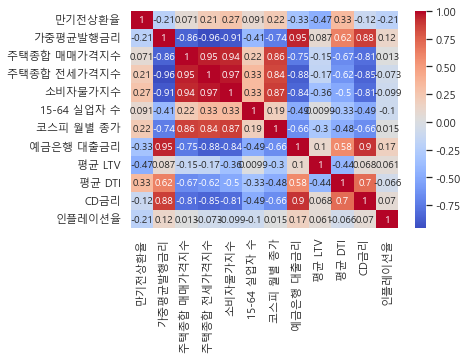

In [15]:
# 히트맵을 위한 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 드로잉
sns.set(rc={'figure.figsize':(16,16)}) # 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 설정
sns.heatmap(data_a.corr(), annot=True, cmap='coolwarm') # 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨지는 걸 방지함
plt.show()

In [16]:
# VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_a.values, i) for i in range(data_a.shape[1])]
vif["features"] = data_a.columns

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,30678.293405,소비자물가지수
1,4725.758338,15-64 실업자 수
2,4420.181148,평균 DTI
3,3714.995290,코스피 월별 종가
4,2894.884416,평균 LTV
5,2403.400273,주택종합 전세가격지수
6,1651.790058,주택종합 매매가격지수
7,842.658531,가중평균발행금리
8,632.874988,예금은행 대출금리
9,37.276105,CD금리


In [17]:
# # VIF before Min-Max Scaling
# vif_a = pd.DataFrame()
# vif_a["VIF Factor"] = [variance_inflation_factor(feature_data_A.values, i) for i in range(feature_data_A.shape[1])]
# vif_a["features"] = feature_data_A.columns

# vif_a = vif_a.sort_values(by="VIF Factor", ascending=False)
# vif_a = vif_a.reset_index().drop(columns='index')
# vif_a

# # VIF before Min-Max Scaling
# vif_b = pd.DataFrame()
# vif_b["VIF Factor"] = [variance_inflation_factor(feature_data_B.values, i) for i in range(feature_data_B.shape[1])]
# vif_b["features"] = feature_data_B.columns

# vif_b = vif_b.sort_values(by="VIF Factor", ascending=False)
# vif_b = vif_b.reset_index().drop(columns='index')
# vif_b

# # VIF after Min-Max Scaling
# vif_c = pd.DataFrame()
# vif_c["VIF Factor"] = [variance_inflation_factor(feature_data_C.values, i) for i in range(feature_data_C.shape[1])]
# vif_c["features"] = feature_data_C.columns

# vif_c = vif_c.sort_values(by="VIF Factor", ascending=False)
# vif_c = vif_c.reset_index().drop(columns='index')
# vif_c

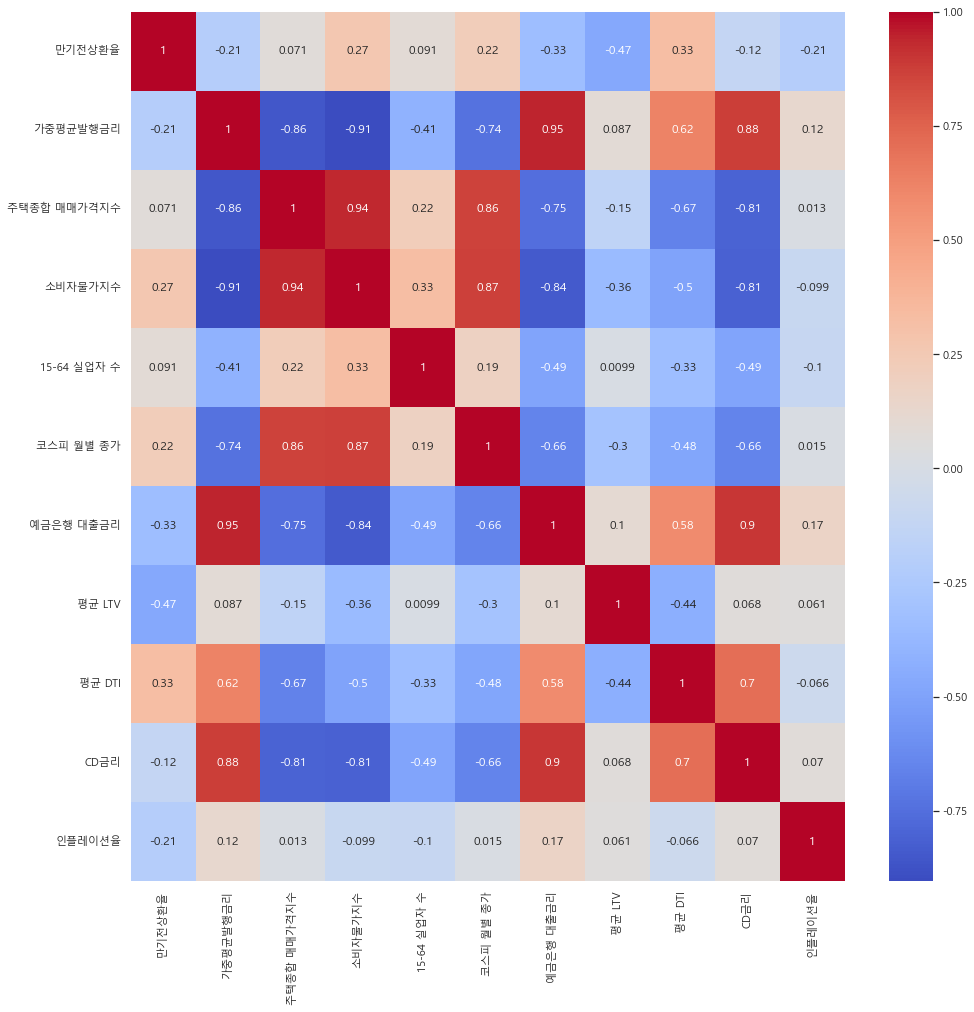

In [18]:
# 히트맵을 보고 컬럼에서 상관관계가 높다고 생각된 컬럼들 선정
data_b = data_a.copy()
data_b.drop(columns=['주택종합 전세가격지수'], inplace=True)

# 상관관계 재확인
sns.set(rc={'figure.figsize':(16,16)}) # 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 설정
sns.heatmap(data_b.corr(), annot=True, cmap='coolwarm') # 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨지는 걸 방지함
plt.show()

#### if Scaling
- Standard : 데이터를 표준정규분포 모양으로 만듬 -> 데이터 특성을 반영 못 하니까 못 씁니다
- Robuster : 아웃라이어를 없애버림 -> 막판에 만기전상환율이 튀는 걸 살리는 게 맞는 것 같습니다 (못 써요)
- Min-Max : 아웃라이어 살리고 데이터 분포 살리고 (남는 게 이거 뿐이네요)

In [19]:
# lag 등을 고려하지 않고 현재 데이터에서 그냥 회귀분석

data_c = data_b.copy().reset_index()
data_c

,기준월,만기전상환율,가중평균발행금리,주택종합 매매가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율
0,2004-07,0.270000,5.020000,52.743,4.278318,6.677083,6.666690,1.790091,61.090000,29.270000,1.363537,0.612876
1,2004-08,0.270000,4.846667,52.603,4.284428,6.754604,6.600333,1.780024,60.920000,31.370000,1.363537,0.868235
2,2004-09,0.380000,4.700000,52.394,4.293072,6.735780,6.689064,1.757858,60.830000,32.417500,1.308333,0.000000
3,2004-10,0.508000,4.600000,52.283,4.293072,6.664409,6.727540,1.728109,60.896000,33.138000,1.258461,0.000000
4,2004-11,0.358333,4.515000,52.157,4.293072,6.685861,6.727240,1.717395,60.976667,33.403333,1.258461,-0.602533
...,...,...,...,...,...,...,...,...,...,...,...,...
209,2022-02,0.929633,2.478739,100.000,4.651004,6.659294,7.887336,1.348073,60.585462,30.043799,0.329304,0.582673
210,2022-03,0.839380,2.477937,100.207,4.656813,6.684612,7.900703,1.355835,60.576111,30.068175,0.405465,0.721747
211,2022-04,0.888984,2.463891,100.306,4.664005,6.682109,7.922134,1.345472,60.578833,30.048621,0.405465,0.744861
212,2022-05,0.828517,2.447768,100.517,4.671426,6.700731,7.899172,1.360977,60.550400,30.002507,0.494696,0.664483


In [20]:
# Min - Max Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
mm_temp = data_c.drop(columns=['기준월','만기전상환율'])
colnames = data_c.columns.drop(['기준월','만기전상환율'])

# Training
# scaler.fit(mm_df)

# Traning & Scaling
mm_data = scaler.fit_transform(mm_temp)

mm_result = pd.DataFrame(mm_data, columns=colnames)
mm_result

,가중평균발행금리,주택종합 매매가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율
0,0.922279,0.023902,0.000000,0.270948,0.044228,0.796034,0.779071,0.000000,0.808211,0.702174
1,0.860130,0.021056,0.015285,0.411797,0.000000,0.787312,0.738665,0.404489,0.808211,0.834290
2,0.807542,0.016809,0.036912,0.377595,0.059141,0.768107,0.717274,0.606252,0.783771,0.385088
3,0.771687,0.014553,0.036912,0.247920,0.084785,0.742334,0.732961,0.745031,0.761692,0.385088
4,0.741210,0.011992,0.036912,0.286896,0.084586,0.733051,0.752134,0.796137,0.761692,0.073353
...,...,...,...,...,...,...,...,...,...,...
209,0.011105,0.984391,0.932341,0.238626,0.857809,0.413075,0.659152,0.149045,0.350339,0.686548
210,0.010817,0.988598,0.946876,0.284627,0.866718,0.419800,0.656930,0.153740,0.384057,0.758501
211,0.005781,0.990610,0.964867,0.280079,0.881002,0.410822,0.657576,0.149973,0.384057,0.770460
212,0.000000,0.994898,0.983432,0.313914,0.865698,0.424255,0.650819,0.141091,0.423561,0.728874


In [21]:
# Min-Max 스케일링 잘 됐는지 확인
mm_result.describe()

,가중평균발행금리,주택종합 매매가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.475174,0.391619,0.545529,0.442031,0.608737,0.471166,0.490067,0.619326,0.588164,0.483619
std,0.342226,0.224773,0.265811,0.239491,0.191978,0.272720,0.275303,0.253078,0.240071,0.182136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151139,0.245137,0.339965,0.272091,0.530060,0.244010,0.295559,0.429185,0.421530,0.350115
50%,0.345682,0.389199,0.632525,0.401178,0.655505,0.424255,0.512553,0.674756,0.636004,0.478849
75%,0.844064,0.521072,0.766320,0.596864,0.701062,0.714181,0.653614,0.832489,0.764200,0.594392
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# 최적의 알파값을 찾기 위한 GridSearch 수행
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# ...을 하기 전에 피처랑 타겟 설정
feature_data = mm_result # ALL

# 주요 요인 별로 나눈 이유 -> 위에서 VIF를 보시면 아시겠지만...
feature_data_A = mm_result[['가중평균발행금리', '예금은행 대출금리', 'CD금리']] # 금리 요인
feature_data_B = mm_result[['주택종합 매매가격지수', '평균 LTV', '평균 DTI']] # 부동산 요인
feature_data_C = mm_result[['15-64 실업자 수', '인플레이션율', '코스피 월별 종가']] # 거시경제 요인
target = data_a['만기전상환율']

In [54]:
# 최적의 알파를 찾아나가봅시다

# a = 0.01 # 최초 알파값
# alpha_list = [] # 알파 후보 담을 리스트

# # 하이퍼 파라미터 값을 찾아야하므로 아무것도 선언하지 않은 모델 생성
# model_test = ElasticNet()

# # alpha_list에 0.01부터 1.00 까지 alpha 후보 100개 저장함
# for i in range(0,100):
#     a = round(a, 2)
#     alpha_list.append(a)
#     a += 0.01

# # grid search 수행
# grid_search = GridSearchCV(model_test, param_grid={'alpha' : alpha_list})
# grid_search.fit(feature_data[:161], target[:161])

# print(grid_search.best_params_) # best alpha
# MSE = np.abs(grid_search.best_score_)
# RMSE = np.sqrt(np.abs(MSE))
# print(f'MSE : {MSE} | RMSE: {RMSE}')

# 75% 수준의 데이터만 가지고 돌렸을 때
# 전체적인 알파값 : Ridge -> 1.0, Lasso -> 0.05, Elastic -> 0.06
# feature_data_A 금리 요인 : Ridge -> 1.0, Lasso -> 0.04, Elastic -> 0.03
# feature_data_B 부동산 요인 : Ridge -> 1.0, Lasso -> 0.03, Elastic -> 0.02
# feature_data_C 거시경제 요인 : Ridge -> 0.27, Lasso -> 0.01, Elastic -> 0.01

# 모델 전체로 잡고 돌렸을 때
# feature_data_A 금리 요인 : Ridge -> 1.0, Lasso -> 0.22, Elastic -> 0.43
# feature_data_B 부동산 요인 : Ridge -> 1.0, Lasso -> 0.08, Elastic -> 0.19
# feature_data_C 거시경제 요인 : Ridge -> 1.0, Lasso -> 0.12, Elastic -> 0.23

<module 'test_package' from 'c:\\Users\\luck1\\Documents\\국비지원\\포트폴리오\\01_프로젝트1\\code\\test_package\\__init__.py'>

In [55]:
# 위에서 변수 바꿔줘야하는 게 하나 둘이 아니기 때문에

# GridSearchCV 수행하는 함수를 담은 패키지를 따로 만들어서 뺐습니다
from test_package import find_best_alpha

# find_best_alpha(type, data, target)
# type : ridge, lasso, elastic

find_best_alpha('elastic', feature_data[:161], target[:161])

Type : elastic | {'alpha': 0.01} | MSE : 0.05172044517765371 | RMSE: 0.22742129446833625


In [25]:
# VIF after Min-Max Scaling
vif_x = pd.DataFrame()
vif_x["VIF Factor"] = [variance_inflation_factor(feature_data.values, i) for i in range(feature_data.shape[1])]
vif_x["features"] = feature_data.columns

vif_x = vif_x.sort_values(by="VIF Factor", ascending=False)
vif_x = vif_x.reset_index().drop(columns='index')
vif_x

,VIF Factor,features
0,238.701268,소비자물가지수
1,154.397942,주택종합 매매가격지수
2,96.588611,예금은행 대출금리
3,80.225675,CD금리
4,56.828745,코스피 월별 종가
5,48.758384,가중평균발행금리
6,31.469620,평균 DTI
7,8.936159,인플레이션율
8,8.108613,평균 LTV
9,7.533575,15-64 실업자 수


In [26]:
# VIF after Min-Max Scaling
vif_a = pd.DataFrame()
vif_a["VIF Factor"] = [variance_inflation_factor(feature_data_A.values, i) for i in range(feature_data_A.shape[1])]
vif_a["features"] = feature_data_A.columns

vif_a = vif_a.sort_values(by="VIF Factor", ascending=False)
vif_a = vif_a.reset_index().drop(columns='index')
vif_a

,VIF Factor,features
0,47.992178,예금은행 대출금리
1,24.708044,가중평균발행금리
2,18.592080,CD금리


In [27]:
# VIF after Min-Max Scaling
vif_b = pd.DataFrame()
vif_b["VIF Factor"] = [variance_inflation_factor(feature_data_B.values, i) for i in range(feature_data_B.shape[1])]
vif_b["features"] = feature_data_B.columns

vif_b = vif_b.sort_values(by="VIF Factor", ascending=False)
vif_b = vif_b.reset_index().drop(columns='index')
vif_b

,VIF Factor,features
0,2.659064,평균 LTV
1,2.375083,평균 DTI
2,2.321795,주택종합 매매가격지수


In [28]:
# VIF after Min-Max Scaling
vif_c = pd.DataFrame()
vif_c["VIF Factor"] = [variance_inflation_factor(feature_data_C.values, i) for i in range(feature_data_C.shape[1])]
vif_c["features"] = feature_data_C.columns

vif_c = vif_c.sort_values(by="VIF Factor", ascending=False)
vif_c = vif_c.reset_index().drop(columns='index')
vif_c

,VIF Factor,features
0,7.141412,코스피 월별 종가
1,5.110120,인플레이션율
2,4.081643,15-64 실업자 수


In [29]:
# 요인 별 RMSE 스코어 계산

import test_package as tp
# Hand-made Function
# tp.score_checker(type, data, target, alpha)
# type = 'ridge', 'lasso', 'elastic'

print('전체 요인')
tp.score_checker('ridge', feature_data[:161], target[:161], 1.0)
tp.score_checker('lasso', feature_data[:161], target[:161], 0.04)
tp.score_checker('elastic', feature_data[:161], target[:161], 0.03)

print('\n금리 요인')
tp.score_checker('ridge', feature_data_A[:161], target[:161], 1.0)
tp.score_checker('lasso', feature_data_A[:161], target[:161], 0.04)
tp.score_checker('elastic', feature_data_A[:161], target[:161], 0.03)

print('\n부동산 요인\n')
tp.score_checker('ridge', feature_data_B[:161], target[:161], 1.0)
tp.score_checker('lasso', feature_data_B[:161], target[:161], 0.03)
tp.score_checker('elastic', feature_data_B[:161], target[:161], 0.02)

print('\n거시경제 요인')
tp.score_checker('ridge', feature_data_C[:161], target[:161], 0.27)
tp.score_checker('lasso', feature_data_C[:161], target[:161], 0.01)
tp.score_checker('elastic', feature_data_C[:161], target[:161], 0.01)

# 전반적으로 2번째 폴드가 점수는 좋아보임
# 전반적으로 1.3 ~ 1.4 스코어..

전체 요인
Alpha : 1.0
Ridge Negative MSE score : [0.681 0.136 0.09  1.168 3.91 ]
Ridge RMSE scores : [0.825 0.369 0.301 1.081 1.977]
Ridge AVG RMSE : 0.911

Alpha : 0.04
Lasso Negative MSE score : [0.675 0.095 0.105 1.49  3.071]
Lasso RMSE scores : [0.822 0.309 0.324 1.221 1.752]
Lasso AVG RMSE : 0.885

Alpha : 0.03
Elastic Negative MSE score : [0.6   0.19  0.106 1.418 3.14 ]
Elastic RMSE scores : [0.775 0.436 0.325 1.191 1.772]
Elastic AVG RMSE : 0.900

금리 요인
Alpha : 1.0
Ridge Negative MSE score : [0.78  0.058 0.344 1.498 3.615]
Ridge RMSE scores : [0.883 0.241 0.587 1.224 1.901]
Ridge AVG RMSE : 0.967

Alpha : 0.04
Lasso Negative MSE score : [0.856 0.072 0.275 1.63  3.063]
Lasso RMSE scores : [0.925 0.268 0.524 1.277 1.75 ]
Lasso AVG RMSE : 0.949

Alpha : 0.03
Elastic Negative MSE score : [0.875 0.096 0.3   1.605 3.173]
Elastic RMSE scores : [0.935 0.31  0.547 1.267 1.781]
Elastic AVG RMSE : 0.968

부동산 요인

Alpha : 1.0
Ridge Negative MSE score : [0.341 1.219 0.683 1.91  3.485]
Ridge RMSE 

In [30]:
# length -> 214 (60% 0~128, 20% 129~171, 20% 172~214)
# feature_data_A : 금리 요인 (alpha = 0.03)
# feature_data_B : 부동산 요인 (alpha = 0.02)
# feature_data_C : 거시경제 요인 (alpha = 0.01)

# x_train, x_test, y_train, y_test = train_test_split(feature_data_A, target, test_size=0.2)
# p_model = ElasticNet(alpha=0.03)
# p_model.fit(x_train, y_train)
# p_pred = p_model.predict(x_test)

xa_train, xa_test, ya_train, ya_test = train_test_split(feature_data_A, target, test_size=0.25, random_state=25)
xa_model = ElasticNet(alpha=0.03, random_state=25)
xa_model.fit(xa_train, ya_train)
xa_pred = xa_model.predict(xa_test)

xb_train, xb_test, yb_train, yb_test = train_test_split(feature_data_B, target, test_size=0.25, random_state=25)
xb_model = ElasticNet(alpha=0.02, random_state=25)
xb_model.fit(xb_train, yb_train)
xb_pred = xb_model.predict(xb_test)

xc_train, xc_test, yc_train, yc_test = train_test_split(feature_data_C, target, test_size=0.25, random_state=25)
xc_model = ElasticNet(alpha=0.01, random_state=25)
xc_model.fit(xc_train, yc_train)
xc_pred = xc_model.predict(xc_test)

xd_train, xd_test, yd_train, yd_test = train_test_split(feature_data, target, test_size=0.25, random_state=25)
xd_model = ElasticNet(alpha=0.03, random_state=25)
xd_model.fit(xd_train, yd_train)
xd_pred = xd_model.predict(xd_test)

In [31]:
feature_data_A

,가중평균발행금리,예금은행 대출금리,CD금리
0,0.922279,0.796034,0.808211
1,0.860130,0.787312,0.808211
2,0.807542,0.768107,0.783771
3,0.771687,0.742334,0.761692
4,0.741210,0.733051,0.761692
...,...,...,...
209,0.011105,0.413075,0.350339
210,0.010817,0.419800,0.384057
211,0.005781,0.410822,0.384057
212,0.000000,0.424255,0.423561


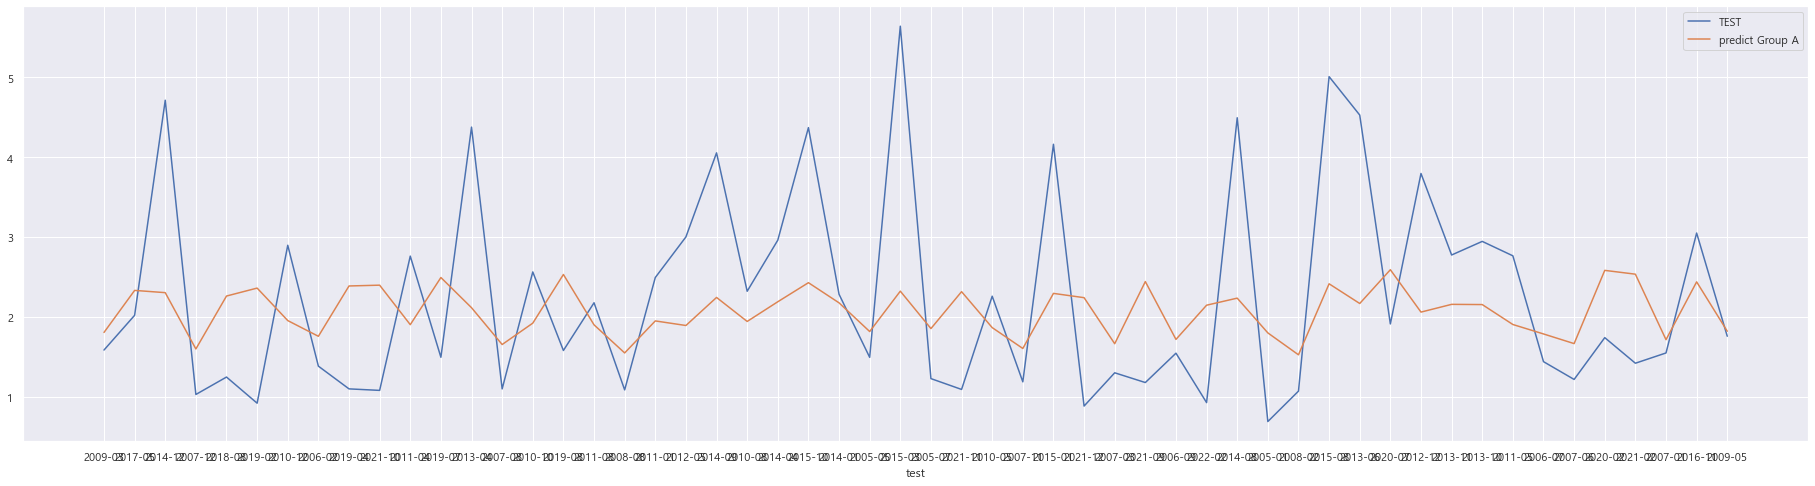

In [32]:
feature_data_X = feature_data_A[['예금은행 대출금리']]

xx_train, xx_test, yx_train, yx_test = train_test_split(feature_data_X, target, test_size=0.25, random_state=25)
xx_model = ElasticNet(alpha=0.03, random_state=25)
xx_model.fit(xx_train, yx_train)
xx_pred = xx_model.predict(xx_test)

fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.plot(yx_test, label="TEST")
plt.plot(xx_pred, label="predict Group A")
plt.legend(loc='upper right')
plt.show()

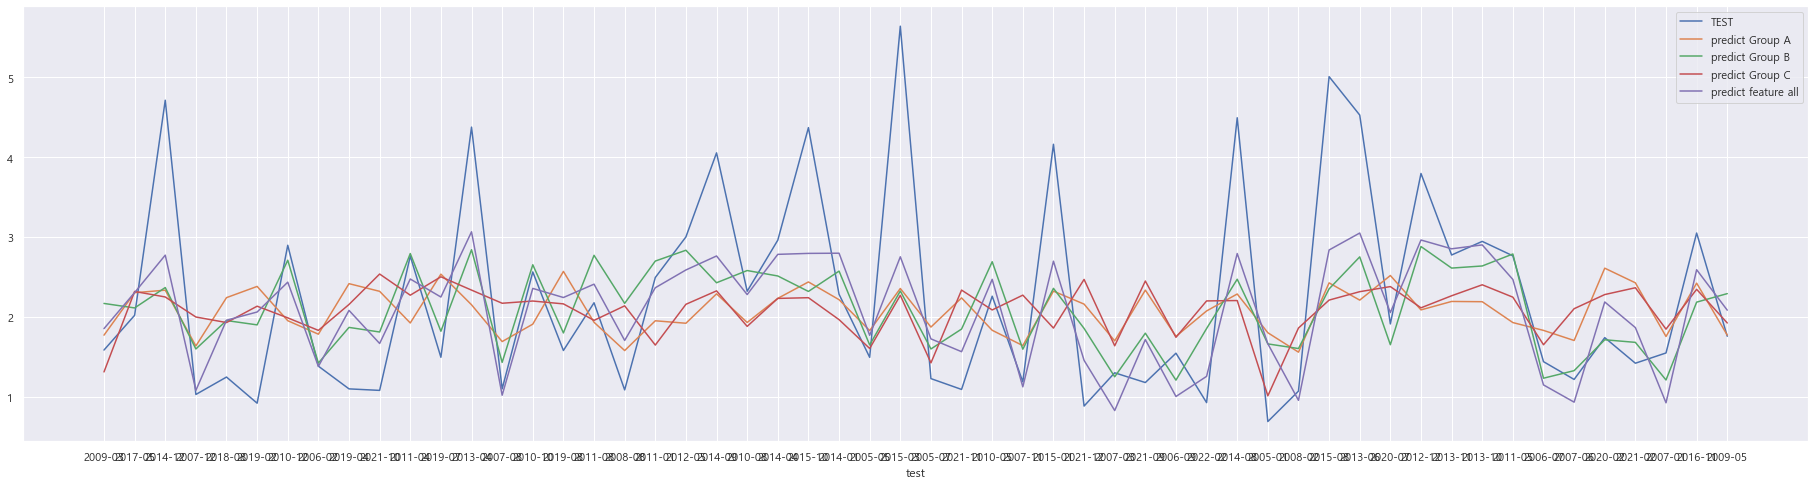

In [33]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.plot(yd_test, label="TEST")
plt.plot(xa_pred, label="predict Group A")
plt.plot(xb_pred, label="predict Group B")
plt.plot(xc_pred, label="predict Group C")
plt.plot(xd_pred, label="predict feature all")

plt.legend(loc='upper right')
plt.show()

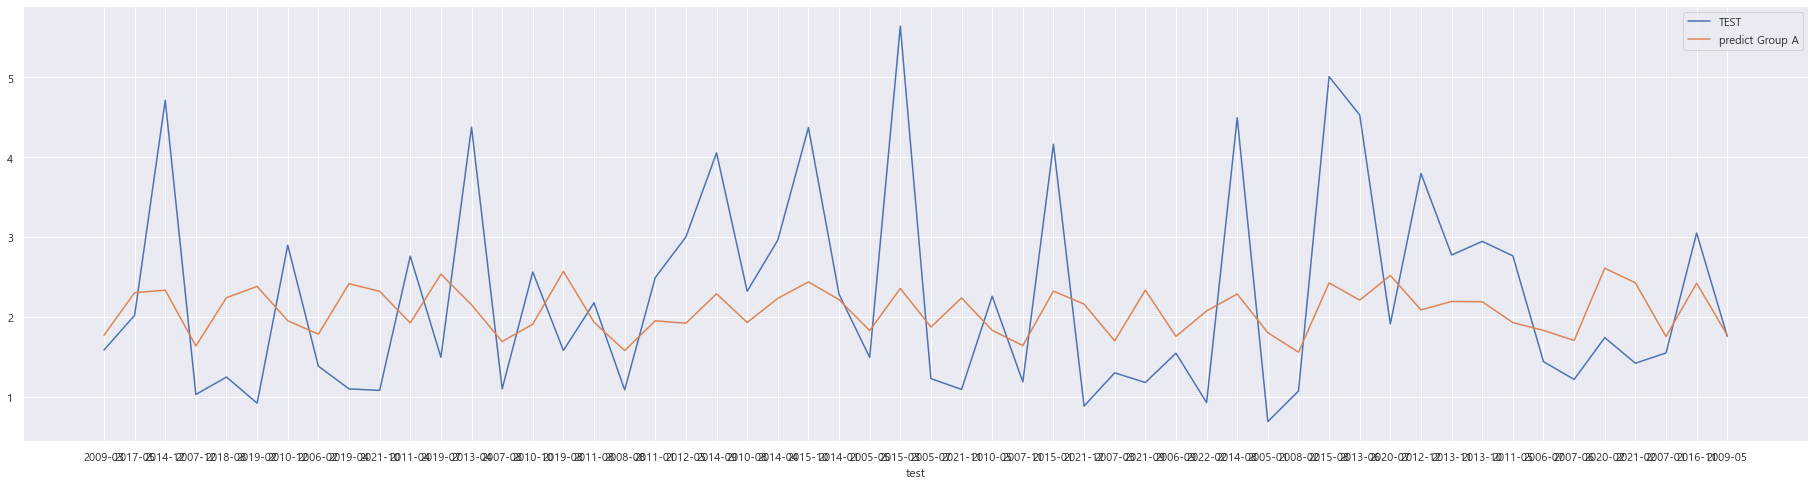

In [34]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.plot(ya_test, label="TEST")
plt.plot(xa_pred, label="predict Group A")
plt.legend(loc='upper right')
plt.show()

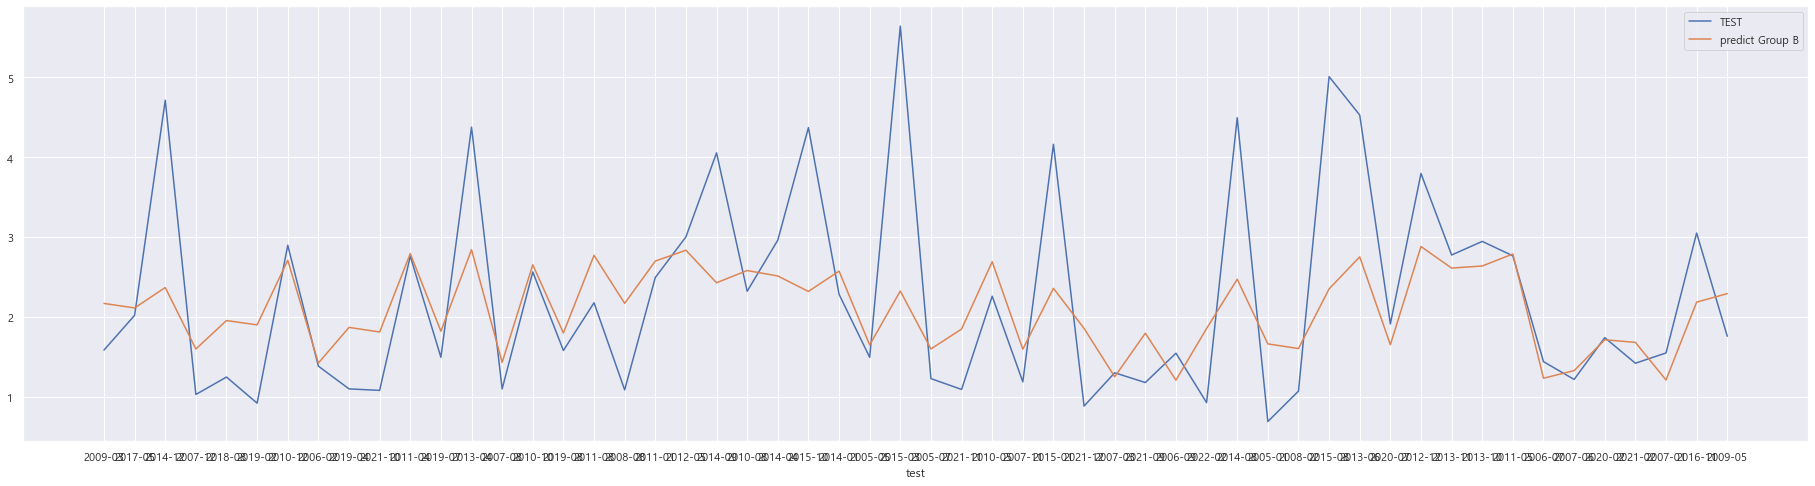

In [35]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.plot(yb_test, label="TEST")
plt.plot(xb_pred, label="predict Group B")
plt.legend(loc='upper right')
plt.show()

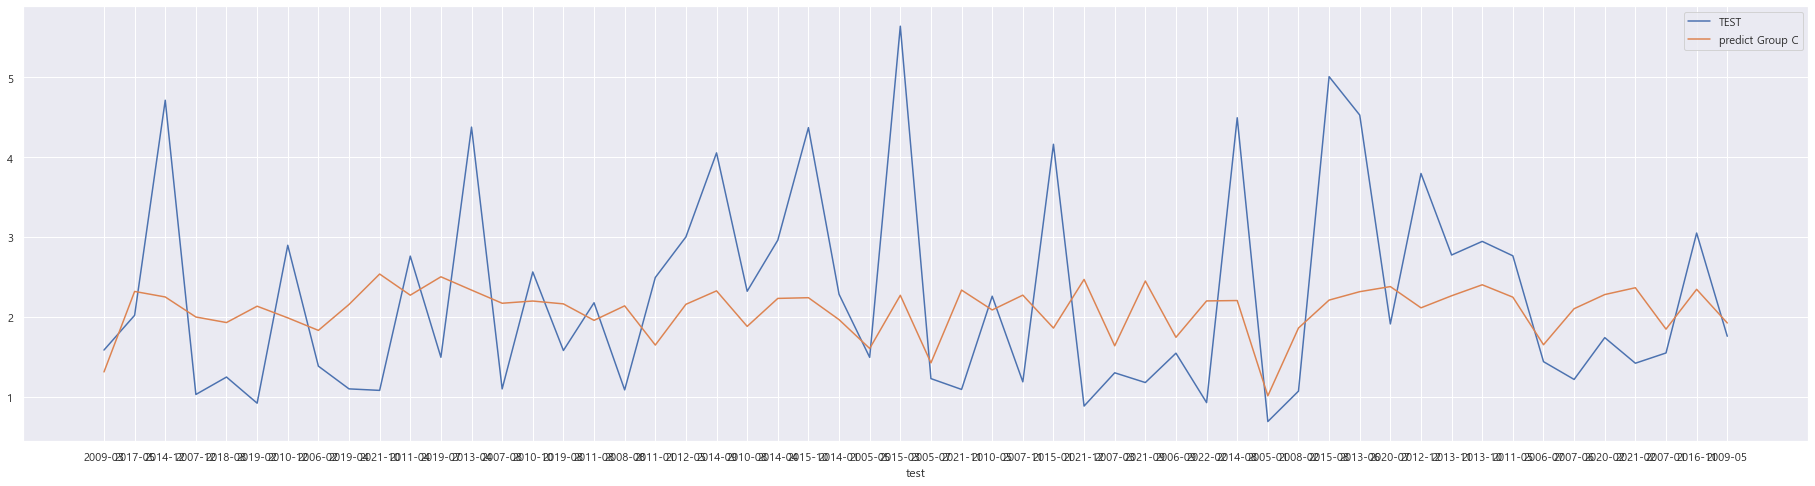

In [36]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.plot(yc_test, label="TEST")
plt.plot(xc_pred, label="predict Group C")
plt.legend(loc='upper right')
plt.show()

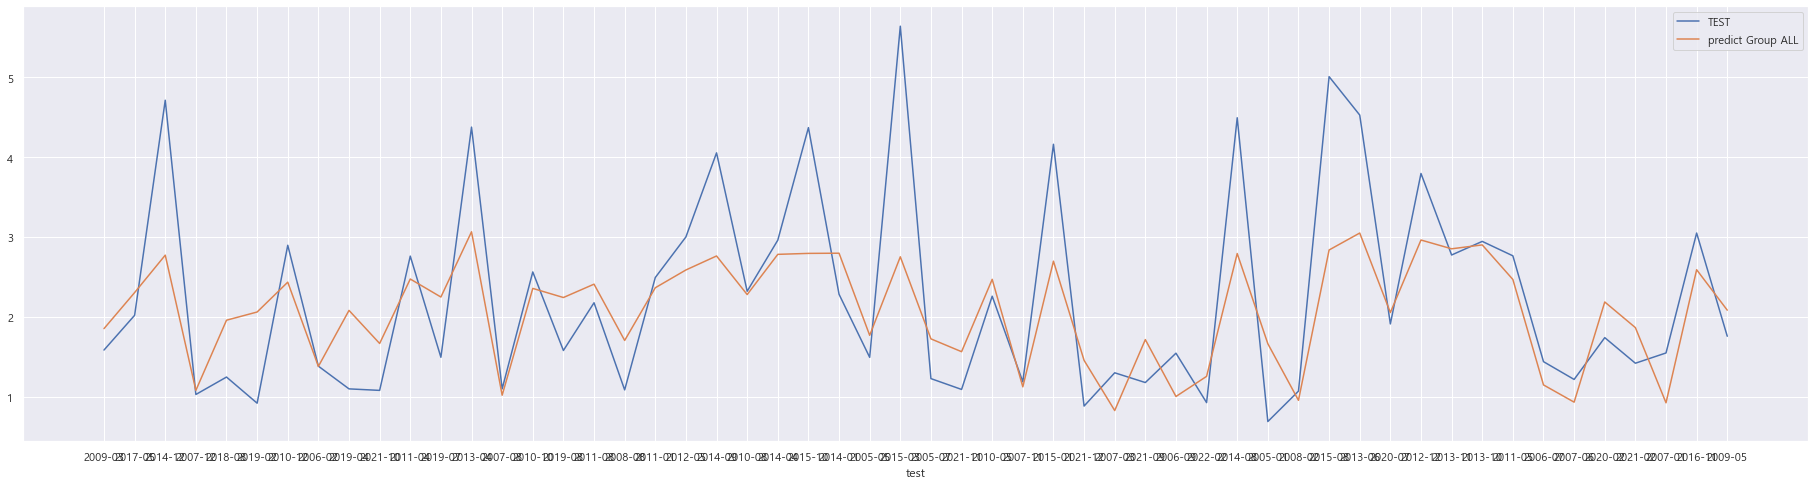

In [37]:
fig, axs = plt.subplots(1,1, figsize=(32,8))
plt.xlabel("test")
plt.plot(yd_test, label="TEST")
plt.plot(xd_pred, label="predict Group ALL")
plt.legend(loc='upper right')
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, accuracy_score

mse_x = mean_squared_error(yx_test, xc_pred)
rmse_x = mse_x ** 0.5

mse_a = mean_squared_error(ya_test, xa_pred)
rmse_a = mse_a ** 0.5

mse_b = mean_squared_error(yb_test, xb_pred)
rmse_b = mse_b ** 0.5

mse_c = mean_squared_error(yc_test, xc_pred)
rmse_c = mse_c ** 0.5

mse_all = mean_squared_error(yd_test, xd_pred)
rmse_all = mse_all ** 0.5


print(f'금리 단독 요인 RMSE : {rmse_x:.3f}')
print(f'금리 혼합 요인 RMSE : {rmse_a:.3f}')
print(f'부동산 요인 RMSE : {rmse_b:.3f}')
print(f'거시경제 요인 RMSE : {rmse_c:.3f}')
print(f'전체 요인 RMSE : {rmse_all:.3f}')

금리 단독 요인 RMSE : 1.231
금리 혼합 요인 RMSE : 1.202
부동산 요인 RMSE : 1.015
거시경제 요인 RMSE : 1.231
전체 요인 RMSE : 0.864
